In [1]:
from pyMez import *

Importing pyMez, this should take roughly 30 seconds
Importing Code.DataHandlers.GeneralModels
It took 2.473 s to import Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.HTMLModels
It took 0.463 s to import Code.DataHandlers.HTMLModels
Importing Code.DataHandlers.NISTModels
It took 7.507 s to import Code.DataHandlers.NISTModels
Importing Code.DataHandlers.TouchstoneModels
It took 0.004 s to import Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
It took 0.132 s to import Code.DataHandlers.XMLModels
Importing Code.DataHandlers.ZipModels
It took 0.011 s to import Code.DataHandlers.ZipModels
Importing Code.InstrumentControl.Experiments
It took 0.693 s to import Code.InstrumentControl.Experiments
Importing Code.InstrumentControl.Instruments
It took 0.007 s to import Code.InstrumentControl.Instruments
Importing Code.Utils.Names
It took 0.005 s to import Code.Utils.Names
It took 11.295 s to import all of the active modules


In [2]:
from Code.Analysis.Transformations import *

In [4]:
w2p_location=r"C:\Share\WR15_Kits_VDI_20180223\True_Thru_WR15_Wave_Parameters_20180223_001.w2p"

In [5]:
schema=read_schema(change_extension(w2p_location,new_extension="schema"))
schema["column_types"]=['float' for i in range(17)]
w2p=AsciiDataTable(w2p_location,**schema)

In [10]:
w2p.column_names

['Frequency',
 'reA1_D1',
 'imA1_D1',
 'reB1_D1',
 'imB1_D1',
 'reA2_D1',
 'imA2_D1',
 'reB2_D1',
 'imB2_D1',
 'reA1_D2',
 'imA1_D2',
 'reB1_D2',
 'imB1_D2',
 'reA2_D2',
 'imA2_D2',
 'reB2_D2',
 'imB2_D2']

In [2]:
def W2p_to_SwitchTerms(w2p):
    """Creates a s2p with switch terms in port1 (reverse), port2 (foward) format given a w2p of a thru"""
    reA1_D2_index=w2p.column_names.index("reA1_D2")
    imA1_D2_index=w2p.column_names.index("imA1_D2")
    reB1_D2_index=w2p.column_names.index("reB1_D2")
    imB1_D2_index=w2p.column_names.index("imB1_D2")
    port_1=[complex(row[reA1_D2_index],row[imA1_D2_index])/complex(row[reB1_D2_index],row[imB1_D2_index]) for row in w2p.data]
    reA2_D1_index=w2p.column_names.index("reA2_D1")
    imA2_D1_index=w2p.column_names.index("imA2_D1")
    reB2_D1_index=w2p.column_names.index("reB2_D1")
    imB2_D1_index=w2p.column_names.index("imB2_D1")
    port_2=[complex(row[reA2_D1_index],row[imA2_D1_index])/complex(row[reB2_D1_index],row[imB2_D1_index]) for row in w2p.data]
    complex_sparameters=[]
    for row_index,row in enumerate(w2p.data[:]):
        new_row=[row[0],port_1[row_index],port_2[row_index]]+[complex(0,0),complex(0,0)]
        complex_sparameters.append(new_row)
    s2p_out=S2PV1(None,sparameter_complex=complex_sparameters)
    return s2p_out

def W2p_to_SwitchTerms_Foward_Reverse(w2p):
    """Creates a s2p with switch terms in port1 (reverse), port2 (foward) format given a w2p of a thru"""
    reA1_D2_index=w2p.column_names.index("reA1_D2")
    imA1_D2_index=w2p.column_names.index("imA1_D2")
    reB1_D2_index=w2p.column_names.index("reB1_D2")
    imB1_D2_index=w2p.column_names.index("imB1_D2")
    port_1=[complex(row[reA1_D2_index],row[imA1_D2_index])/complex(row[reB1_D2_index],row[imB1_D2_index]) for row in w2p.data]
    reA2_D1_index=w2p.column_names.index("reA2_D1")
    imA2_D1_index=w2p.column_names.index("imA2_D1")
    reB2_D1_index=w2p.column_names.index("reB2_D1")
    imB2_D1_index=w2p.column_names.index("imB2_D1")
    port_2=[complex(row[reA2_D1_index],row[imA2_D1_index])/complex(row[reB2_D1_index],row[imB2_D1_index]) for row in w2p.data]
    complex_sparameters=[]
    for row_index,row in enumerate(w2p.data[:]):
        new_row=[row[0],port_2[row_index],port_1[row_index]]+[complex(0,0),complex(0,0)]
        complex_sparameters.append(new_row)
    s2p_out=S2PV1(None,sparameter_complex=complex_sparameters)
    return s2p_out


In [28]:
for column_index,column_name in enumerate(w2p.column_names):
    print("Column index is {0} : Column name is {1}".format(column_index,column_name))

Column index is 0 : Column name is Frequency
Column index is 1 : Column name is reA1_D1
Column index is 2 : Column name is imA1_D1
Column index is 3 : Column name is reB1_D1
Column index is 4 : Column name is imB1_D1
Column index is 5 : Column name is reA2_D1
Column index is 6 : Column name is imA2_D1
Column index is 7 : Column name is reB2_D1
Column index is 8 : Column name is imB2_D1
Column index is 9 : Column name is reA1_D2
Column index is 10 : Column name is imA1_D2
Column index is 11 : Column name is reB1_D2
Column index is 12 : Column name is imB1_D2
Column index is 13 : Column name is reA2_D2
Column index is 14 : Column name is imA2_D2
Column index is 15 : Column name is reB2_D2
Column index is 16 : Column name is imB2_D2


In [3]:
def W2p_to_S2p(w2p):
    """Creates a s2p with given a w2p assumes data columns are [Frequency,reA1_D1,imA1_D1,reB1_D1,imB1_D1...imB2_D2]
    Returns the 3 -reciever sparameters or b1/a1 etc."""
    complex_sparameters=[]
    for row_index,row in enumerate(w2p.data[:]):
        # B1_D1/A1_D1
        S11=complex(row[3],row[4])/complex(row[1],row[2])
        # B2_D1/A1_D1
        S21=complex(row[7],row[8])/complex(row[1],row[2])
        # B1_D2/A2_D2
        S12=complex(row[11],row[12])/complex(row[13],row[14])
        # B2_D2/A2_D2
        S22=complex(row[15],row[16])/complex(row[13],row[14])
        new_row=[row[0],S11,S12,S21,S22]
        complex_sparameters.append(new_row)
    s2p_out=S2PV1(None,sparameter_complex=complex_sparameters)
    return s2p_out
def S2p_to_S1p(s2p,column="S11"):
    """Creates an s1p from an s2p by taking column and frequency, column can be any value in ["S11","S21","S12","S22"]"""
    columns=["S11","S21","S12","S22"]
    s2p.change_data_format("RI")
    s2p.change_frequency_units("GHz")
    index=columns.index(column)+1
    sparameter_complex=[]
    for row_index,row in enumerate(s2p.sparameter_complex[:]):
        sparameter_complex.append([row[0],row[index]])
    options=s2p.options.copy()
    options["column_names"]=["Frequency","reS11","imS11"]
    options["sparameter_complex"]=sparameter_complex
    options["number_ports"]=1
    s1p_out=S1PV1(None,**options)
    return s1p_out

def S1ps_toS2p(S11_s1p,S22_s1p,S21_fill_value=complex(0,0)):
    """Creates an s2p from two s1ps by filling S11 with S11_s1p and S22 with S22_s1p and S21, and S12 with S21_fill_value,
    Default is 0+ 0i. Assumes both have the same frequency list. """
    #first make sure both s1p 's  are in the right format
    S11_s1p.change_data_format("RI")
    S22_s1p.change_data_format("RI")
    #check the frequency lists
    if len(S11_s1p.data)!=len(S22_s1p.data):
        raise
    sparameter_complex=[]
    for row_index, row in enumerate(S11_s1p.data):
        new_row=[row[0],
                 complex(row[1],row[2]),
                 S21_fill_value,
                 S21_fill_value,
                 complex(S22_s1p.data[row_index][1],rowS22_s1p.data[row_index][2])]
        sparameter_complex.append(new_row)
    options={}
    options["sparameter_complex"]=sparameter_complex
    s2p=S2PV1(None,**options)
    return s2p


In [6]:
s2p=W2p_to_S2p(w2p)

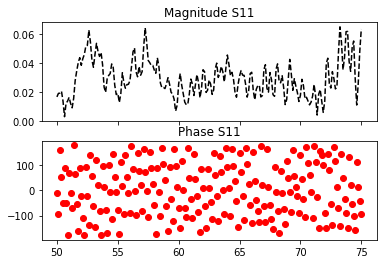

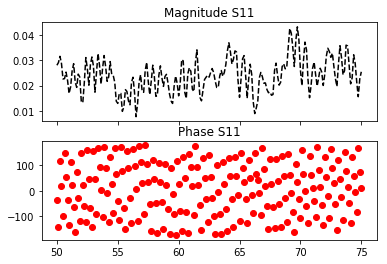

In [9]:
s1p=S2p_to_S1p(s2p,"S22")
s1p.show();
s1p=S2p_to_S1p(s2p,"S11")
s1p.show();

In [56]:
print s1p.options

{'general_descriptor': 'Sparameter', 'noiseparameter_data': [], 'inline_comment_begin': '!', 'sparameter_end_line': 253, 'column_descriptions': None, 'inline_comment_end': '', 'comments': [], 'nosieparameter_row_formatter_string': '{0:.4g}{delimiter}{1:.4g}{delimiter}{2:.4g}{delimiter}{3:.4g}{delimiter}{4:.4g}', 'metadata': None, 'specific_descriptor': 'Two_Port', 'option_line_line': 0, 'sparameter_row_formatter_string': '{0:.4g}{delimiter}{1:.4g}{delimiter}{2:.4g}{delimiter}{3:.4g}{delimiter}{4:.4g}{delimiter}{5:.4g}{delimiter}{6:.4g}{delimiter}{7:.4g}{delimiter}{8:.4g}', 'sparameter_complex': [[50.0, 50.0], [50.1, 50.1], [50.2, 50.2], [50.3, 50.3], [50.4, 50.4], [50.5, 50.5], [50.6, 50.6], [50.7, 50.7], [50.8, 50.8], [50.9, 50.9], [51.0, 51.0], [51.1, 51.1], [51.2, 51.2], [51.3, 51.3], [51.4, 51.4], [51.5, 51.5], [51.6, 51.6], [51.7, 51.7], [51.8, 51.8], [51.9, 51.9], [52.0, 52.0], [52.1, 52.1], [52.2, 52.2], [52.3, 52.3], [52.4, 52.4], [52.5, 52.5], [52.6, 52.6], [52.7, 52.7], [52.8

<IPython.core.display.Javascript object>


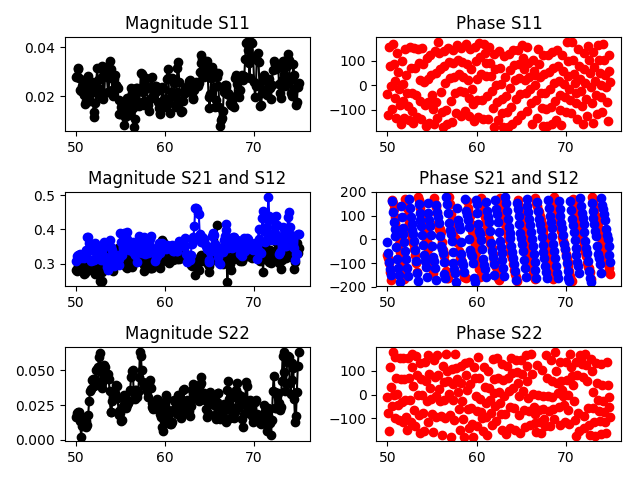

In [54]:
s2p.show();

In [20]:
switch=W2p_to_SwitchTerms(w2p)

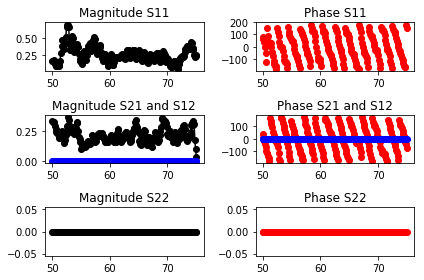

In [21]:
switch.show();

In [25]:
switch.path=r"C:\Share\WR15_Kits_VDI_20180223\GTrue_Thru_WR15_Wave_Parameters_20180223_001.s2p"

In [26]:
switch.save()

In [33]:
s2p.path=r"C:\Share\WR15_Kits_VDI_20180223\True_Thru_WR15_Wave_Parameters_20180223_001.s2p"
s2p.save()

In [3]:
directory=r"C:\Share\WR15_DataAnalysis\Raw_Reflect\Port1"
file_names=os.listdir(directory)


IndexError: tuple index out of range

In [4]:
reflect_port_1=[]
for file_name in file_names:
    file_name=os.path.join(directory,file_name)
    if re.search(".s1p",file_name,re.IGNORECASE):
        reflect_port_1.append(S1PV1(file_name))
    elif re.search(".s2p",file_name,re.IGNORECASE):
        reflect_port_1.append(S2PV1(file_name))
    else:
        print("Could not load {0}".format(file_name))

<IPython.core.display.Javascript object>


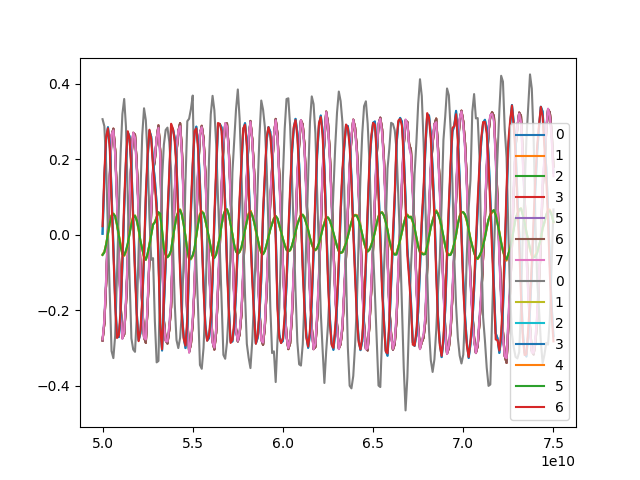

In [15]:
%matplotlib notebook
for index,reflect in enumerate(reflect_port_1):
    if index==4:
        pass
    else:
        plt.plot(reflect["Frequency"],reflect["reS11"],label=index)
    
    
plt.legend()
plt.show()

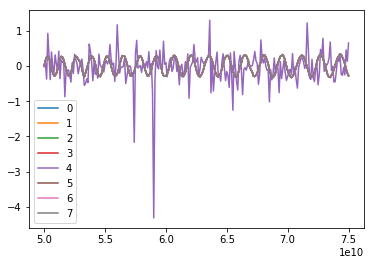

In [12]:
for index,reflect in enumerate(reflect_port_1):
    plt.plot(reflect["Frequency"],reflect["imS11"],label=index)
plt.legend()
plt.show()

In [16]:
reflect_port_1[4].path

'C:\\Share\\WR15_DataAnalysis\\Raw_Reflect\\Port1\\Short_Port1_WR15_20180213_001.s2p'

<IPython.core.display.Javascript object>


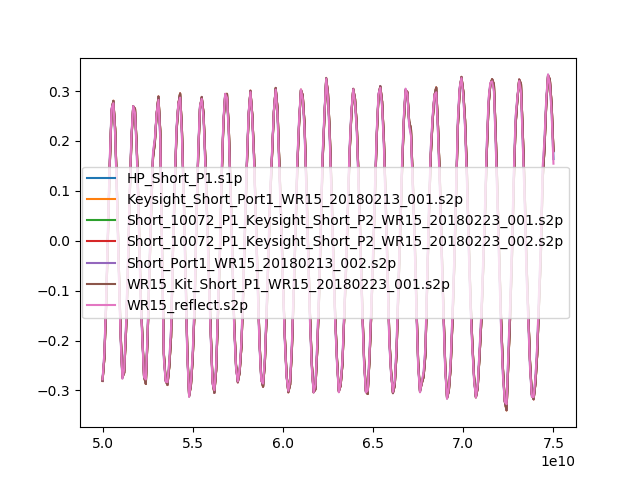

In [38]:
directory=r"C:\Share\WR15_DataAnalysis\Raw_Reflect\Port1"
file_names=os.listdir(directory)
reflect_port_2=[]
for file_name in file_names:
    file_name=os.path.join(directory,file_name)
    if re.search(".s1p",file_name,re.IGNORECASE):
        reflect_port_2.append(S1PV1(file_name))
    elif re.search(".s2p",file_name,re.IGNORECASE):
        reflect_port_2.append(S2PV1(file_name))
    else:
        print("Could not load {0}".format(file_name))
plt.close()
for index,reflect in enumerate(reflect_port_2):
    if re.search("S1p",file_names[index],re.IGNORECASE):
        plt.plot(reflect["Frequency"],reflect["reS11"],label=file_names[index])
    else:
        plt.plot(reflect["Frequency"],reflect["reS11"],label=file_names[index])
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


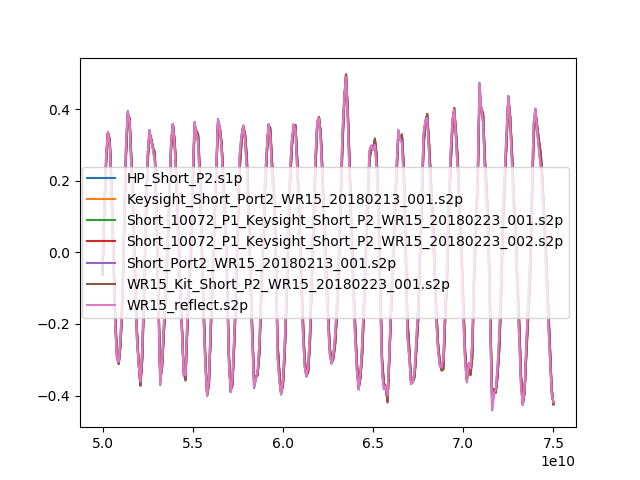

In [34]:
directory=r"C:\Share\WR15_DataAnalysis\Raw_Reflect\Port2"
file_names=os.listdir(directory)
reflect_port_2=[]
for file_name in file_names:
    file_name=os.path.join(directory,file_name)
    if re.search(".s1p",file_name,re.IGNORECASE):
        reflect_port_2.append(S1PV1(file_name))
    elif re.search(".s2p",file_name,re.IGNORECASE):
        reflect_port_2.append(S2PV1(file_name))
    else:
        print("Could not load {0}".format(file_name))
plt.close()
for index,reflect in enumerate(reflect_port_2):
    if re.search("S1p",file_names[index],re.IGNORECASE):
        plt.plot(reflect["Frequency"],reflect["reS11"],label=file_names[index])
    else:
        plt.plot(reflect["Frequency"],reflect["reS22"],label=file_names[index])
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


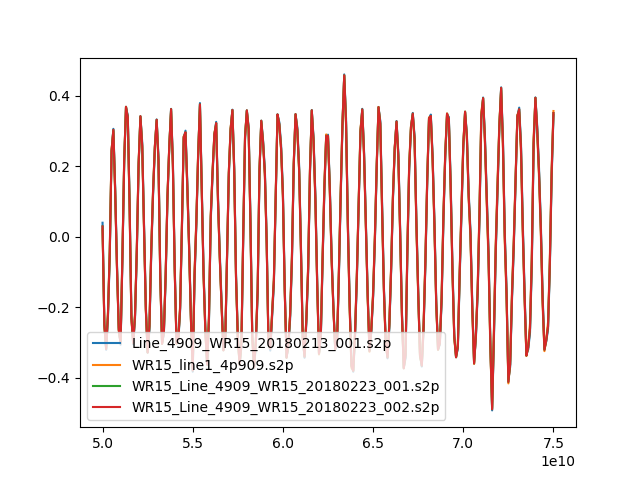

In [35]:
directory=r"C:\Share\WR15_DataAnalysis\Raw_Line_4909"
file_names=os.listdir(directory)
reflect_port_2=[]
for file_name in file_names[:]:
    file_name=os.path.join(directory,file_name)
    if re.search(".s1p",file_name,re.IGNORECASE):
        reflect_port_2.append(S1PV1(file_name))
    elif re.search(".s2p",file_name,re.IGNORECASE):
        reflect_port_2.append(S2PV1(file_name))
    else:
        print("Could not load {0}".format(file_name))
plt.close()
for index,reflect in enumerate(reflect_port_2):
    plt.plot(reflect["Frequency"],reflect["imS21"],label=file_names[index])
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


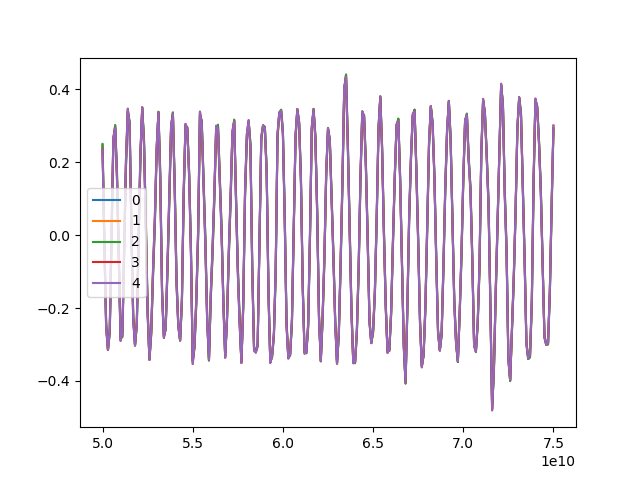

In [25]:
directory=r"C:\Share\WR15_DataAnalysis\Raw_Section"
file_names=os.listdir(directory)
reflect_port_2=[]
for file_name in file_names:
    file_name=os.path.join(directory,file_name)
    if re.search(".s1p",file_name,re.IGNORECASE):
        reflect_port_2.append(S1PV1(file_name))
    elif re.search(".s2p",file_name,re.IGNORECASE):
        reflect_port_2.append(S2PV1(file_name))
    else:
        print("Could not load {0}".format(file_name))
plt.close()
for index,reflect in enumerate(reflect_port_2):
    plt.plot(reflect["Frequency"],reflect["reS21"],label=index)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


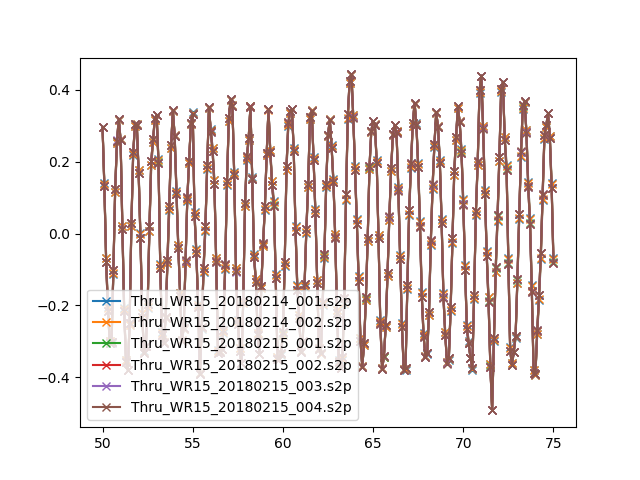

In [49]:
directory=r"C:\Share\WR15_DataAnalysis\Raw_Thru"
file_names=os.listdir(directory)
reflect_port_2=[]
for file_name in file_names:
    file_name=os.path.join(directory,file_name)
    if re.search(".s1p",file_name,re.IGNORECASE):
        reflect_port_2.append(S1PV1(file_name))
    elif re.search(".s2p",file_name,re.IGNORECASE):
        reflect_port_2.append(S2PV1(file_name))
    else:
        print("Could not load {0}".format(file_name))
plt.close()
for index,reflect in enumerate(reflect_port_2[0:6]):
    plt.plot(reflect["Frequency"],reflect["reS21"],'-x',label=file_names[index])
plt.legend()
plt.show()

In [41]:
from pyMez.Code.Analysis.Reports import *

In [43]:
report=CheckStandardReport(None,Device_Id="C15102")

IndexError: list index out of range

In [44]:
x=ResultFileModel(r"C:\Share\resfiles\C15102")

IndexError: list index out of range

In [51]:
directory=r"C:\Share\WR15_DataAnalysis\Waveparameter\Raw_Thru"
file_names=os.listdir(directory)
output_directory=r"C:\Share\WR15_DataAnalysis\Waveparameter\Thru_s2p"
switch_directory=r"C:\Share\WR15_DataAnalysis\Waveparameter\GThru_s2p"
switch_FR_directory=r"C:\Share\WR15_DataAnalysis\Waveparameter\GThru_s2p_FR"
s2p_list=[]
for file_name in file_names:
    if re.search("\.w2p",file_name,re.IGNORECASE):
        path=os.path.join(directory,file_name)
        schema=read_schema(change_extension(path,new_extension="schema"))
        schema["column_types"]=["float" for i in range(17)]
        w2p=AsciiDataTable(path,**schema)
        s2p=W2p_to_S2p(w2p)
        switch=W2p_to_SwitchTerms(w2p)
        switch_FR=W2p_to_SwitchTerms_Foward_Reverse(w2p)
        s2p.path=os.path.join(output_directory,change_extension(file_name,new_extension="s2p"))
        switch.path=os.path.join(switch_directory,"G"+change_extension(file_name,new_extension="s2p"))
        switch_FR.path=os.path.join(switch_FR_directory,"G"+change_extension(file_name,new_extension="s2p"))
        s2p.save()
        switch.save()
        switch_FR.save()
    else:
        pass
        
        
        

<IPython.core.display.Javascript object>


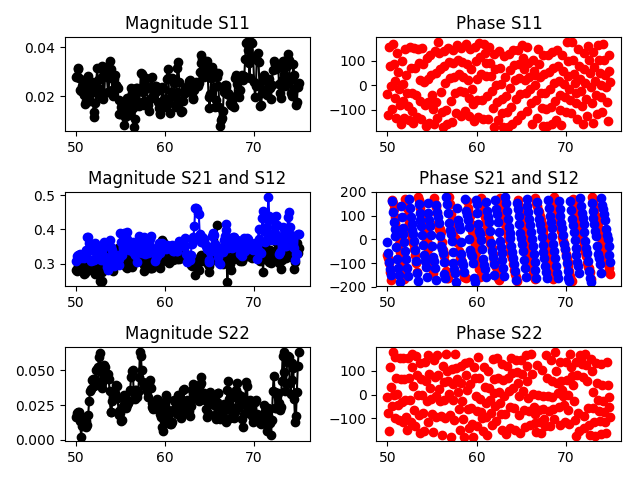

<IPython.core.display.Javascript object>


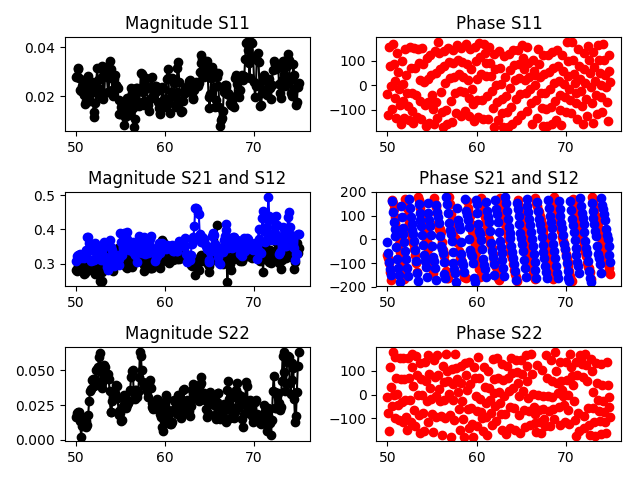

In [48]:
s2p.show()

In [ ]:
S2p_to